DATA COLLECTION

In [2]:
import pandas as pd
import numpy as np


In [3]:

df = pd.read_csv('./dataset/laptop_price_prediction.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


DATA CLEANING

In [5]:
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)

30


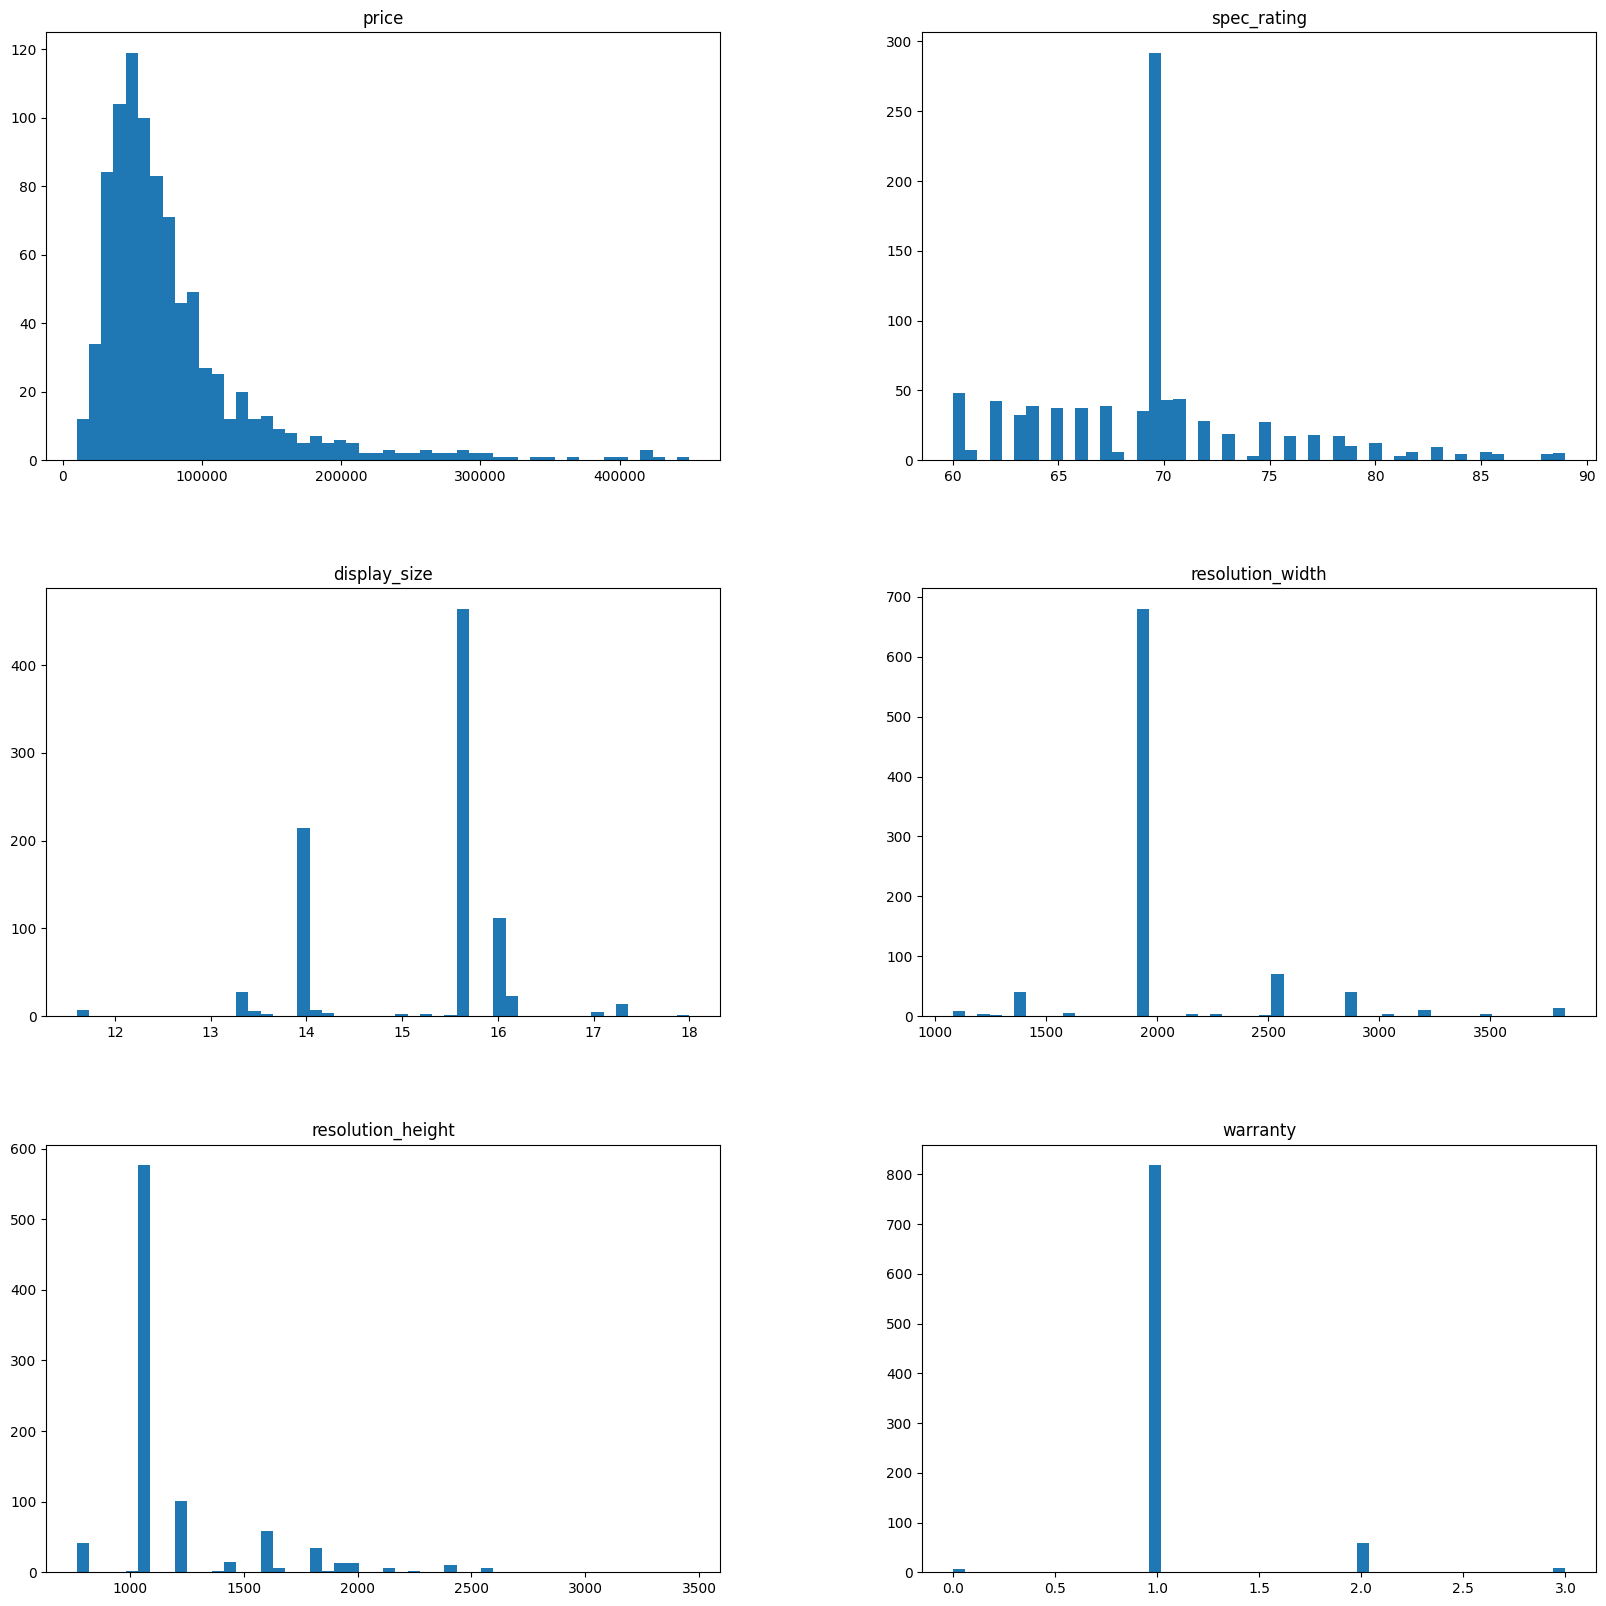

In [6]:
df.hist(figsize=(20, 20), bins=50, grid=False)
print(df.brand.nunique())

In [7]:
brand_freq = df['brand'].value_counts(normalize=True)
df['brand_encoded'] = df['brand'].map(brand_freq)

In [8]:
df.brand_encoded.nunique()

16

In [9]:
num_names = df.dtypes[df.dtypes != 'object'].index

In [10]:
corr_matrix = df[num_names].corr()

In [11]:
corr_matrix.price

price                1.000000
spec_rating          0.546391
display_size         0.233815
resolution_width     0.586042
resolution_height    0.604748
warranty             0.117101
brand_encoded       -0.072500
Name: price, dtype: float64

In [12]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,brand_encoded
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,0.208287
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,0.208287
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,0.094065
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,0.189250
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,0.017917


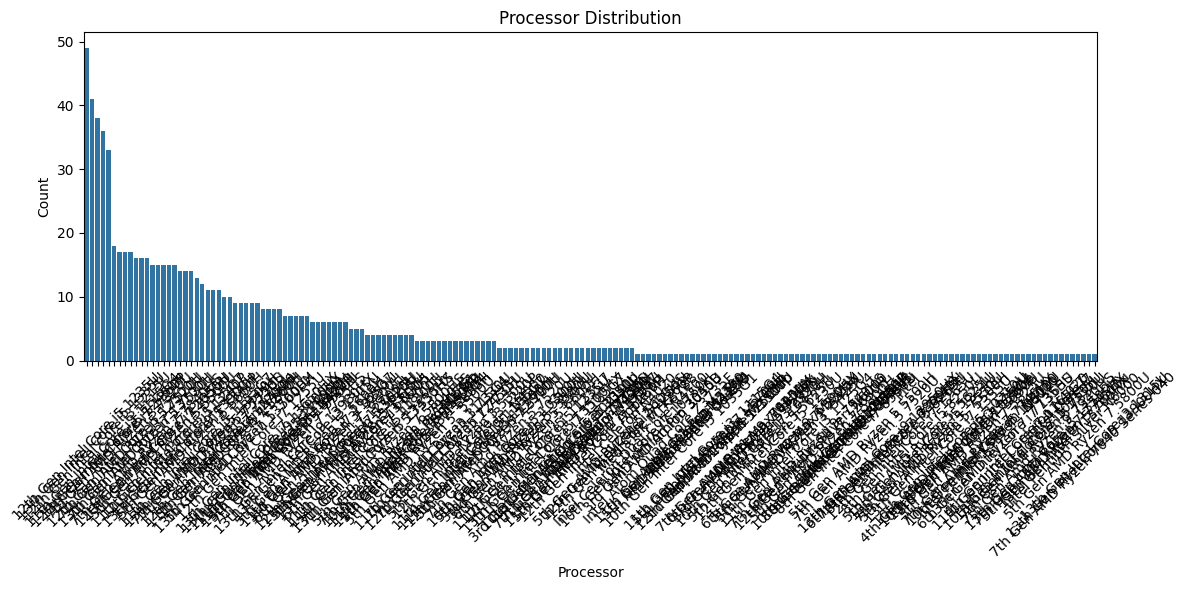

In [13]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='processor', order=df['processor'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Processor Distribution')
plt.xlabel('Processor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# ...existing code...

184


C:\Users\AJAN\AppData\Local\Temp\ipykernel_29632\1869579940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=processor_counts.index, y=processor_counts.values, palette="viridis")


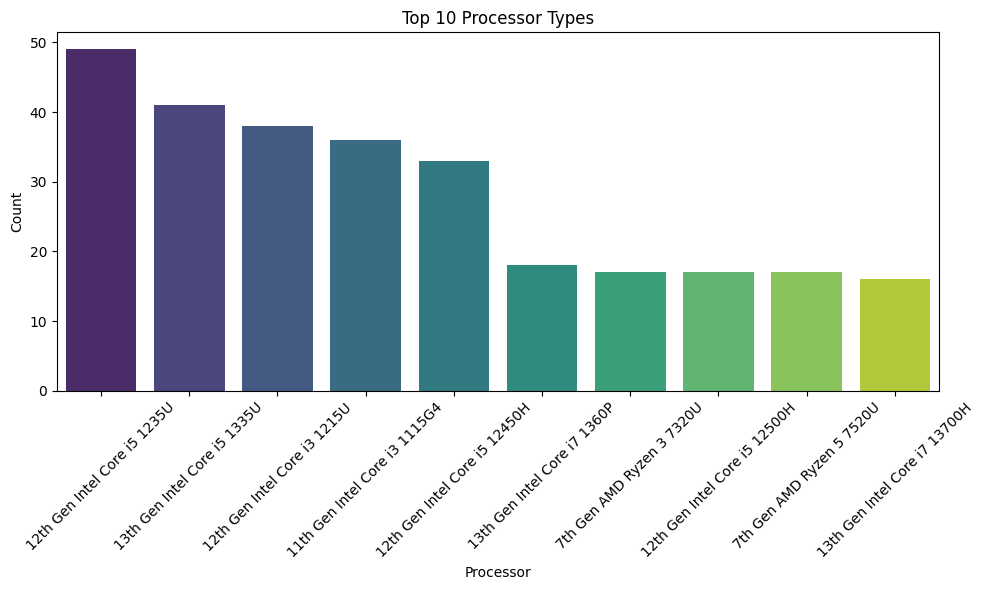

In [14]:
print(df['processor'].nunique())
top_n = 10
processor_counts = df['processor'].value_counts().nlargest(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=processor_counts.index, y=processor_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title(f'Top {top_n} Processor Types')
plt.xlabel('Processor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
# ...existing code...

In [15]:
df.drop(['brand', 'name'], axis=1, inplace=True)

In [16]:
df.head()

,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,brand_encoded
0,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,0.208287
1,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,0.208287
2,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,0.094065
3,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,0.189250
4,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,0.017917


FEATURE ENGINEERING

In [17]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' has {df[col].nunique()} unique values.")
print(df.Ram.unique())
print(df.ROM.unique())
print(df.Ram_type.unique())

Column 'processor' has 184 unique values.
Column 'CPU' has 29 unique values.
Column 'Ram' has 7 unique values.
Column 'Ram_type' has 12 unique values.
Column 'ROM' has 7 unique values.
Column 'ROM_type' has 2 unique values.
Column 'GPU' has 134 unique values.
Column 'OS' has 14 unique values.
['8GB' '16GB' '4GB' '32GB' '2GB' '12GB' '64GB']
['512GB' '256GB' '128GB' '64GB' '1TB' '32GB' '2TB']
['DDR4' 'LPDDR5' 'DDR5' 'LPDDR4' 'LPDDR5X' 'LPDDR4X' 'DDR3' 'LPDDR4x'
 'Unified' 'DDR4-' 'LPDDR5x' 'DDR']


In [18]:
def to_gb(val):
	val = str(val)
	if 'TB' in val:
		return int(val.replace('TB', '')) * 1024
	elif 'GB' in val:
		return int(val.replace('GB', ''))
	else:
		return int(val)
df['ram_rom'] = df['ROM'].apply(to_gb) * df['Ram'].apply(to_gb)



In [19]:
# ...existing code...
from sklearn.preprocessing import OrdinalEncoder

# Define the correct order for RAM and ROM
ram_order = ['2GB', '4GB', '8GB', '12GB', '16GB', '32GB', '64GB']
rom_order = ['32GB', '64GB', '128GB', '256GB', '512GB', '1TB', '2TB']

# Create the encoder and fit_transform the columns
encoder = OrdinalEncoder(categories=[ram_order, rom_order])
df[['Ram', 'ROM']] = encoder.fit_transform(df[['Ram', 'ROM']])

# Check the result
print(df[['Ram', 'ROM']].head())
# ...existing code...

   Ram  ROM
0  2.0  4.0
1  2.0  4.0
2  2.0  4.0
3  4.0  4.0
4  2.0  3.0


In [20]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = oh.fit_transform(df[['ROM_type', 'OS', 'Ram_type']])
encoded_cols = oh.get_feature_names_out(['ROM_type', 'OS', 'Ram_type'])
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)

# Drop original columns and concatenate
df = pd.concat([df.drop(['ROM_type', 'OS', 'Ram_type'], axis=1), encoded_df], axis=1)

In [21]:
for col in ['processor', 'CPU', 'GPU']:
    freq = df[col].value_counts(normalize=True)
    df[f'{col}_freq_enc'] = df[col].map(freq)

In [22]:
df.drop(['processor', 'CPU', 'GPU','Ram','ROM'], axis=1, inplace=True)

In [23]:
processed_df = df.copy()

In [24]:
processed_df.corr()['price'].sort_values(ascending = False)

price                    1.000000
ram_rom                  0.731293
resolution_height        0.604748
resolution_width         0.586042
spec_rating              0.546391
Ram_type_DDR5            0.483999
display_size             0.233815
Ram_type_Unified         0.226220
OS_Mac OS                0.198908
warranty                 0.117101
ROM_type_SSD             0.105690
Ram_type_LPDDR5          0.085969
OS_Mac Catalina OS       0.066909
OS_Mac High Sierra OS    0.066030
OS_Windows 11  OS        0.041161
OS_Windows 11 OS         0.016752
Ram_type_DDR             0.016559
Ram_type_LPDDR5x         0.011056
OS_Mac 10.15.3\t OS      0.009026
Ram_type_DDR3            0.007846
Ram_type_LPDDR4x        -0.000940
Ram_type_DDR4-          -0.001655
Ram_type_LPDDR5X        -0.005776
OS_Ubuntu OS            -0.012465
OS_Windows OS           -0.026647
OS_Windows 10  OS       -0.029673
OS_Windows 10 OS        -0.034228
OS_Android 11 OS        -0.037924
OS_DOS 3.0 OS           -0.041980
brand_encoded 

In [25]:
processed_df

,price,spec_rating,display_size,resolution_width,resolution_height,warranty,brand_encoded,ram_rom,ROM_type_Hard-Disk,ROM_type_SSD,...,Ram_type_LPDDR4,Ram_type_LPDDR4X,Ram_type_LPDDR4x,Ram_type_LPDDR5,Ram_type_LPDDR5X,Ram_type_LPDDR5x,Ram_type_Unified,processor_freq_enc,CPU_freq_enc,GPU_freq_enc
0,49900,73.000000,15.6,1920.0,1080.0,1,0.208287,4096,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015677,0.141097,0.002240
1,39900,60.000000,15.6,1920.0,1080.0,1,0.208287,4096,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042553,0.049272,0.070549
2,26990,69.323529,14.0,1920.0,1080.0,1,0.094065,4096,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040314,0.061590,0.119821
3,59729,66.000000,14.0,2240.0,1400.0,1,0.189250,8192,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.016797,0.092945,0.057111
4,69990,69.323529,13.3,2560.0,1600.0,1,0.017917,2048,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001120,0.005599,0.002240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,44990,69.323529,15.6,1920.0,1080.0,1,0.175812,4096,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001120,0.049272,0.007839
889,110000,71.000000,15.6,2560.0,1440.0,1,0.175812,16384,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005599,0.114222,0.007839
890,189990,89.000000,14.0,2560.0,1600.0,1,0.175812,32768,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004479,0.114222,0.047032
891,129990,73.000000,15.6,1920.0,1080.0,1,0.175812,8192,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017917,0.055991,0.040314


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= processed_df.drop('price', axis=1)
scaled_features = scaler.fit_transform(x)


In [27]:
scaled_df = pd.DataFrame(scaled_features, columns=x.columns, index=x.index)

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

# X = your features, y = your target (e.g., price)
selector = SelectKBest(score_func=f_regression, k=15)  # select top 10 features
X_new = selector.fit_transform(scaled_df,processed_df['price'] )

# To get the selected feature names:

selected_features = x.columns[selector.get_support()]
print(selected_features)

Index(['spec_rating', 'display_size', 'resolution_width', 'resolution_height',
       'warranty', 'ram_rom', 'ROM_type_Hard-Disk', 'ROM_type_SSD',
       'OS_Mac OS', 'Ram_type_DDR4', 'Ram_type_DDR5', 'Ram_type_Unified',
       'processor_freq_enc', 'CPU_freq_enc', 'GPU_freq_enc'],
      dtype='object')


In [29]:
from sklearn.model_selection import train_test_split
x=x
y = processed_df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.decomposition import PCA

# After scaling your features
# scaled_df = pd.DataFrame(scaled_features, columns=x.columns, index=x.index)

# Apply PCA to reduce to, for example, 10 components
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(scaled_df)

# Now use X_pca instead of X_new for train/test split
x = X_pca
y = processed_df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
X_new.shape,processed_df.shape,x_train.shape,y_test.shape

((893, 15), (893, 39), (714, 10), (179,))

In [32]:
processed_df['price']

0       49900
1       39900
2       26990
3       59729
4       69990
        ...  
888     44990
889    110000
890    189990
891    129990
892    131990
Name: price, Length: 893, dtype: int64

In [33]:
from sklearn.linear_model import LinearRegression
lig_reg = LinearRegression()
lig_reg.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred =lig_reg.predict(x_test)
y_pred_test = lig_reg.predict(x_train)

Evalution Metrics


In [35]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

In [36]:
y_test.shape,y_pred.shape

((179,), (179,))

In [37]:
def eva_met(actual=y_test,predicted=y_pred):
    print("rme",root_mean_squared_error(actual,predicted))
    print("mae",mean_absolute_error(actual,predicted))
    print("r2",r2_score(actual,predicted))
    return

In [38]:
print("test prediction")
eva_met()
print("train prediciton :")
eva_met(actual=y_train,predicted=y_pred_test)

test prediction
rme 29856.228140717212
mae 20384.86344482728
r2 0.7398637833305208
train prediciton :
rme 36811.42368122427
mae 24637.641765842018
r2 0.6405093842908035


In [39]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(
    
    random_state=42)

In [40]:
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
dec_pred_test = dec_tree.predict(x_test)
dec_pred_train= dec_tree.predict(x_train)

In [42]:
print("train results:")
eva_met(y_train,dec_pred_train)
print("test results:")
eva_met(y_test,dec_pred_test)

train results:
rme 1296.1949269427496
mae 358.80835667600377
r2 0.9995542791352704
test results:
rme 45203.73643547281
mae 24101.26210428305
r2 0.4036796826410828


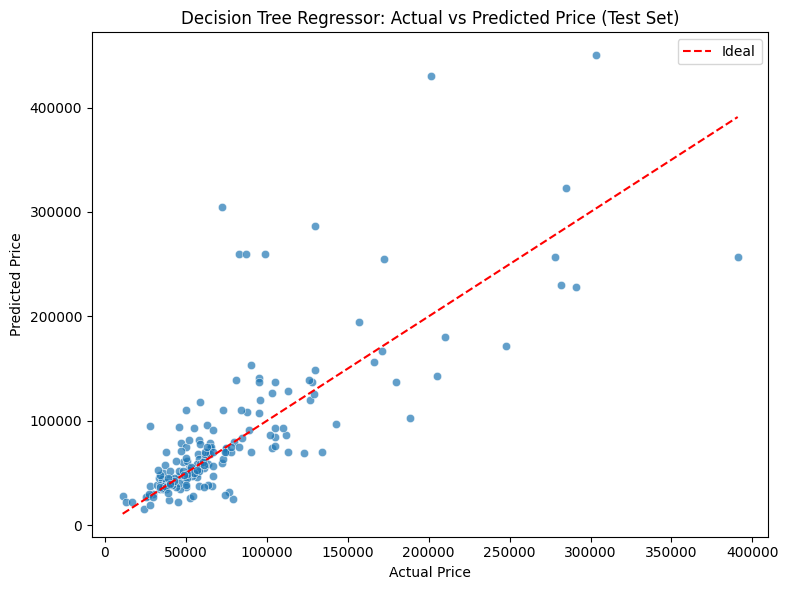

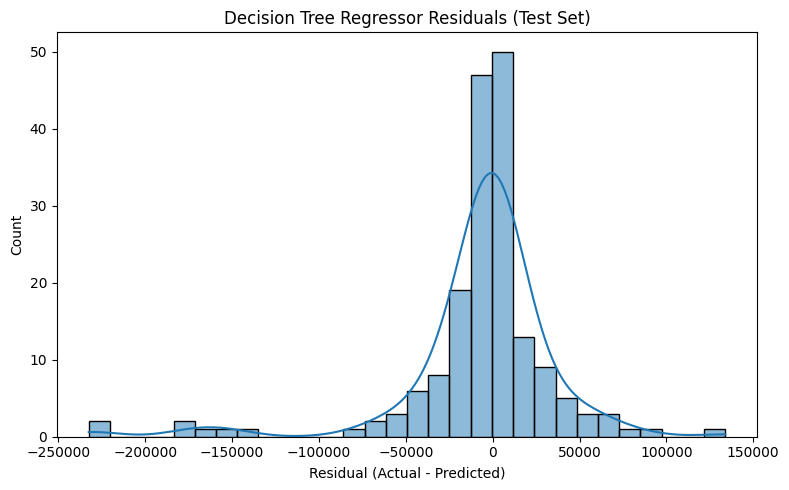

In [43]:
import seaborn as sns

import matplotlib.pyplot as plt

# Visualize predicted vs actual for Decision Tree on test set
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=dec_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regressor: Actual vs Predicted Price (Test Set)')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize residuals for Decision Tree on test set
residuals = y_test - dec_pred_test
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residual (Actual - Predicted)')
plt.title('Decision Tree Regressor Residuals (Test Set)')
plt.tight_layout()
plt.show()

In [44]:
# from sklearn import tree

# import matplotlib.pyplot as plt

# plt.figure(figsize=(55, 45))
# tree.plot_tree(
#     dec_tree,
#     feature_names=selected_features,
#     filled=True,
#     rounded=True,
#     fontsize=10,  # limit depth for readability
#     max_depth=7
# )
# plt.title("Decision Tree Visualization (Top 3 Levels)")
# plt.show()

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

svr = SVR(C=1.0,epsilon=0.5,kernel='rbf',gamma='auto')
rfr = RandomForestRegressor(random_state=42)
xgr = XGBRegressor(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    reg_alpha=1,
    reg_lambda=2,
    subsample=0.8
)
decisiontree_params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [3, 5, 7, 9, 12],
    'min_samples_leaf': [6, 9, 12, 15],
}
randomforrest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [3, 5, 7, 9, 12],
    'min_samples_leaf': [6, 9, 12, 15],
}
svr_params = {
    'kernel': ['rbf', 'linear', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only used if kernel='poly'
}
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

In [96]:
def reg_model_check(model,params):
    gridcv = GridSearchCV(model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
    gridcv.fit(x,y)
    print(gridcv.best_params_)
    print(np.sqrt(-gridcv.best_score_))

In [97]:
# reg_model_check(dec_tree,decisiontree_params)
# reg_model_check(svr,svr_params)
# reg_model_check(rfr,randomforrest_params)
# reg_model_check(xgr,xgb_params)

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgr,x,y,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1)

In [99]:
print('cross val score',-scores)
print('mean rsme:',-scores.mean())

cross val score [26318.78710938 23481.10742188 21312.48242188 29794.21875
 22519.15820312 38124.26171875 41138.86328125 33857.9609375
 40267.09375    26668.72265625]
mean rsme: 30348.265625


In [100]:
xgr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [101]:
xgr_pred_test =xgr.predict(x_test)
xgr_pred_train =xgr.predict(x_train)

In [102]:
print("test evalution")
eva_met(y_test,xgr_pred_test)
print("train evaluation")
eva_met(y_train,xgr_pred_train)

test evalution
rme 25522.279296875
mae 16583.53125
r2 0.8099053502082825
train evaluation
rme 17860.27734375
mae 12384.802734375
r2 0.9153749942779541


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso


base_learners = [
    ('svr',svr),
    ('rgr',lig_reg),
    ('xgb', xgr),
 
]
# Define meta-learner
meta_learner = Lasso(alpha=1.0)
# Create stacking regressor
stacking_reg = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=False,  # Set to True if you want to include original features for meta-learner
    n_jobs=-1
)

# Fit stacking regressor
stacking_reg.fit(x_train, y_train)

# Predict
stack_pred_test = stacking_reg.predict(x_test)
stack_pred_train = stacking_reg.predict(x_train)

# Evaluate
print("Stacking Regressor - Test Evaluation")
eva_met(y_test, stack_pred_test)r̥
print("Stacking Regressor - Train Evaluation")r̥
eva_met(y_train, stack_pred_train)

Stacking Regressor - Test Evaluation
rme 25346.670619903045
mae 16656.92464385275
r2 0.8125123002514446
Stacking Regressor - Train Evaluation
rme 20601.703692505638
mae 14080.466953832505
r2 0.8874025376454475


In [109]:
scores = cross_val_score(stacking_reg, x, y, scoring='neg_root_mean_squared_error', cv=10)


In [110]:
print("CV RMSE:", -scores)
print("CV RMSE:", -scores.mean())
print("CV RMSE:", scores.std())


CV RMSE: [26775.9220627  23341.80283181 22800.07914956 30377.20221476
 23987.48856884 39600.28419053 40737.52659804 33500.13304141
 40296.02176542 26931.6637547 ]
CV RMSE: 30834.81241777818
CV RMSE: 6863.105730055442
